# Titulo: Mapa temático en Python.
## Diplomado: Geoestadística y análisis espacial
## SciData
## Instructor: Alexis Adonai Morales Alberto


In [1]:
# Carga de modulos

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive

In [2]:
# Configuración de google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Ruta completa del archivo de mapa

ruta_mapa = '/content/drive/MyDrive/SciData/GEOAES_25/Mapas/México_ent/00ent'

In [9]:
# Cargar mapa

Mapa = gpd.read_file(ruta_mapa + '.shp')
Mapa.tail(2)

,CVEGEO,CVE_ENT,NOMGEO,geometry
30,31,31,Yucatán,"MULTIPOLYGON (((3511760.832 1023282.324, 35117..."
31,32,32,Zacatecas,"POLYGON ((2470352.986 1453426.983, 2473254.843..."


In [24]:
# Carga de datos de sismos registrados por SMN

ruta_base = '/content/drive/MyDrive/SciData/GEOAES_25/Bases/Sismos_2000_2025.csv'

Sismos = pd.read_csv(ruta_base, skiprows=4, encoding = "latin1")
Sismos.head(2)

/tmp/ipython-input-1639203020.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Sismos = pd.read_csv(ruta_base, skiprows=4, encoding = "latin1")


,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,2000-01-01,00:55:51,3.5,17.12,-100.57,29.0,"13 km al SURESTE de TECPAN, GRO",2000-01-01,06:55:51,revisado
1,2000-01-02,11:35:17,4.3,16.07,-97.35,16.0,"11 km al NORESTE de RIO GRANDE, OAX",2000-01-02,17:35:17,revisado


In [21]:
Sismos.tail(10)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
327400,2025-10-12,04:26:39,3.4,18.151,-102.390,30.4,"14 km al NOROESTE de LA MIRA, MICH",2025-10-12,10:26:39,verificado
327401,2025-10-12,04:47:17,3.6,16.089,-94.526,73.9,"54 km al SURESTE de UNION HIDALGO, OAX",2025-10-12,10:47:17,verificado
327402,2025-10-12,06:24:07,4.3,18.704,-104.227,2.2,"38 km al SUROESTE de CD DE ARMERIA, COL",2025-10-12,12:24:07,verificado
327403,Fecha y hora local en tiempo del centro de Mex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327404,La localizacion es solo una referencia a una l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327405,Los registros con estatus verificado son los c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327406,Los registros obtienen estatus revisado cuando...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327407,Esta informacion puede ser reproducida con fin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327408,Consulta nuestro Aviso Legal y Terminos de Uso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327409,www.ssn.unam.mx | contacto@sismologico.unam.mx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Eliminar las ultimas 7 filas (son notas de la base)

Sismos = Sismos.iloc[:-7,:]
Sismos.tail(10)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
327393,2025-10-12,03:21:50,3.7,22.047,-99.306,5.0,"31 km al OESTE de CD VALLES, SLP",2025-10-12,09:21:50,verificado
327394,2025-10-12,03:22:49,3.6,16.893,-95.861,100.2,"66 km al ESTE de TLACOLULA, OAX",2025-10-12,09:22:49,verificado
327395,2025-10-12,03:25:15,1.5,23.012,-109.746,12.4,"7 km al SUROESTE de SAN JOSE DEL CABO, BCS",2025-10-12,09:25:15,verificado
327396,2025-10-12,03:35:42,3.2,32.282,-115.770,20.2,"43 km al SUROESTE de SANTA ISABEL, BC",2025-10-12,09:35:42,verificado
327397,2025-10-12,04:19:35,3.6,14.975,-93.167,66.2,"59 km al SUROESTE de MAPASTEPEC, CHIS",2025-10-12,10:19:35,verificado
327398,2025-10-12,04:21:04,3.1,19.410,-103.775,90.9,"16 km al NORTE de VILLA DE ALVAREZ, COL",2025-10-12,10:21:04,verificado
327399,2025-10-12,04:24:28,1.7,23.007,-109.739,12.0,"7 km al SUROESTE de SAN JOSE DEL CABO, BCS",2025-10-12,10:24:28,verificado
327400,2025-10-12,04:26:39,3.4,18.151,-102.390,30.4,"14 km al NOROESTE de LA MIRA, MICH",2025-10-12,10:26:39,verificado
327401,2025-10-12,04:47:17,3.6,16.089,-94.526,73.9,"54 km al SURESTE de UNION HIDALGO, OAX",2025-10-12,10:47:17,verificado
327402,2025-10-12,06:24:07,4.3,18.704,-104.227,2.2,"38 km al SUROESTE de CD DE ARMERIA, COL",2025-10-12,12:24:07,verificado


In [25]:
# Convertir variable o columna "Magnitud" en numérico

Sismos['Magnitud'] = pd.to_numeric(Sismos['Magnitud'], errors = "coerce")

In [52]:
# Convertir el DataFrame en GeoDataFrame

Sismos_GDF = gpd.GeoDataFrame(
    Sismos,
    geometry=gpd.points_from_xy(
        Sismos['Longitud'],
        Sismos['Latitud']
    ),
    crs = "4326"
)

Sismos_GDF.head(2)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,geometry
0,2000-01-01,00:55:51,3.5,17.12,-100.57,29.0,"13 km al SURESTE de TECPAN, GRO",2000-01-01,06:55:51,revisado,POINT (-100.57 17.12)
1,2000-01-02,11:35:17,4.3,16.07,-97.35,16.0,"11 km al NORESTE de RIO GRANDE, OAX",2000-01-02,17:35:17,revisado,POINT (-97.35 16.07)


In [53]:
# Extraer la referencia de los km

Sismos_GDF['km_epicentro'] = (
    Sismos_GDF['Referencia de localizacion']
    .str.extract(r"(\d+(?:\.d+)?)\s*km")[0]
    .astype(float)
)

Sismos_GDF.head(2)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,geometry,km_epicentro
0,2000-01-01,00:55:51,3.5,17.12,-100.57,29.0,"13 km al SURESTE de TECPAN, GRO",2000-01-01,06:55:51,revisado,POINT (-100.57 17.12),13.0
1,2000-01-02,11:35:17,4.3,16.07,-97.35,16.0,"11 km al NORESTE de RIO GRANDE, OAX",2000-01-02,17:35:17,revisado,POINT (-97.35 16.07),11.0


In [54]:
# Filtro para el mapa (sismos de mágnitud 5.5 en adelante y menores a 200 km del epicentro)

Sismos_GDF_ct = Sismos_GDF[
    (Sismos_GDF['Magnitud'] >= 5.5) &
    (Sismos_GDF['km_epicentro'] <200)
].copy()

Sismos_GDF_ct.head(2)


,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,geometry,km_epicentro
206,2000-03-12,16:21:32,5.9,14.59,-92.97,35.0,"81 km al SUROESTE de HUIXTLA, CHIS",2000-03-12,22:21:32,revisado,POINT (-92.97 14.59),81.0
624,2000-07-21,01:13:39,6.0,18.09,-98.97,48.0,"45 km al SUROESTE de CHIAUTLA DE TAPIA, PUE",2000-07-21,06:13:39,revisado,POINT (-98.97 18.09),45.0


In [55]:
# Primeros pasos para el mapa

# 1. Calcular los quintiles

qt = Sismos_GDF_ct['Magnitud'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# 2. Crear variable categórica

Sismos_GDF_ct['Magnitud_qt'] = pd.cut(
    Sismos_GDF_ct['Magnitud'],
    bins = qt,
    include_lowest=True
)

# 3. Generaer etiquetas

labels = [
    f"{qt[i]:.1f} - {qt[i+1]:.1f}"
    for i in range(5)
]

In [56]:
labels

['5.5 - 5.6', '5.6 - 5.7', '5.7 - 5.9', '5.9 - 6.2', '6.2 - 8.2']

In [57]:
# 4. Tamaños de puntos por quintil

size_map = dict(zip(
    Sismos_GDF_ct['Magnitud_qt'].cat.categories,
    [20, 40, 60, 80, 100]
))

Sismos_GDF_ct['size'] = Sismos_GDF_ct['Magnitud_qt'].map(size_map)

Sismos_GDF_ct.head(2)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,geometry,km_epicentro,Magnitud_qt,size
206,2000-03-12,16:21:32,5.9,14.59,-92.97,35.0,"81 km al SUROESTE de HUIXTLA, CHIS",2000-03-12,22:21:32,revisado,POINT (-92.97 14.59),81.0,"(5.88, 6.2]",80
624,2000-07-21,01:13:39,6.0,18.09,-98.97,48.0,"45 km al SUROESTE de CHIAUTLA DE TAPIA, PUE",2000-07-21,06:13:39,revisado,POINT (-98.97 18.09),45.0,"(5.88, 6.2]",80


In [58]:
# 5. Forzar el sistema de cordenadas igual al del mapa

Sismos_GDF_ct = Sismos_GDF_ct.to_crs(Mapa.crs)

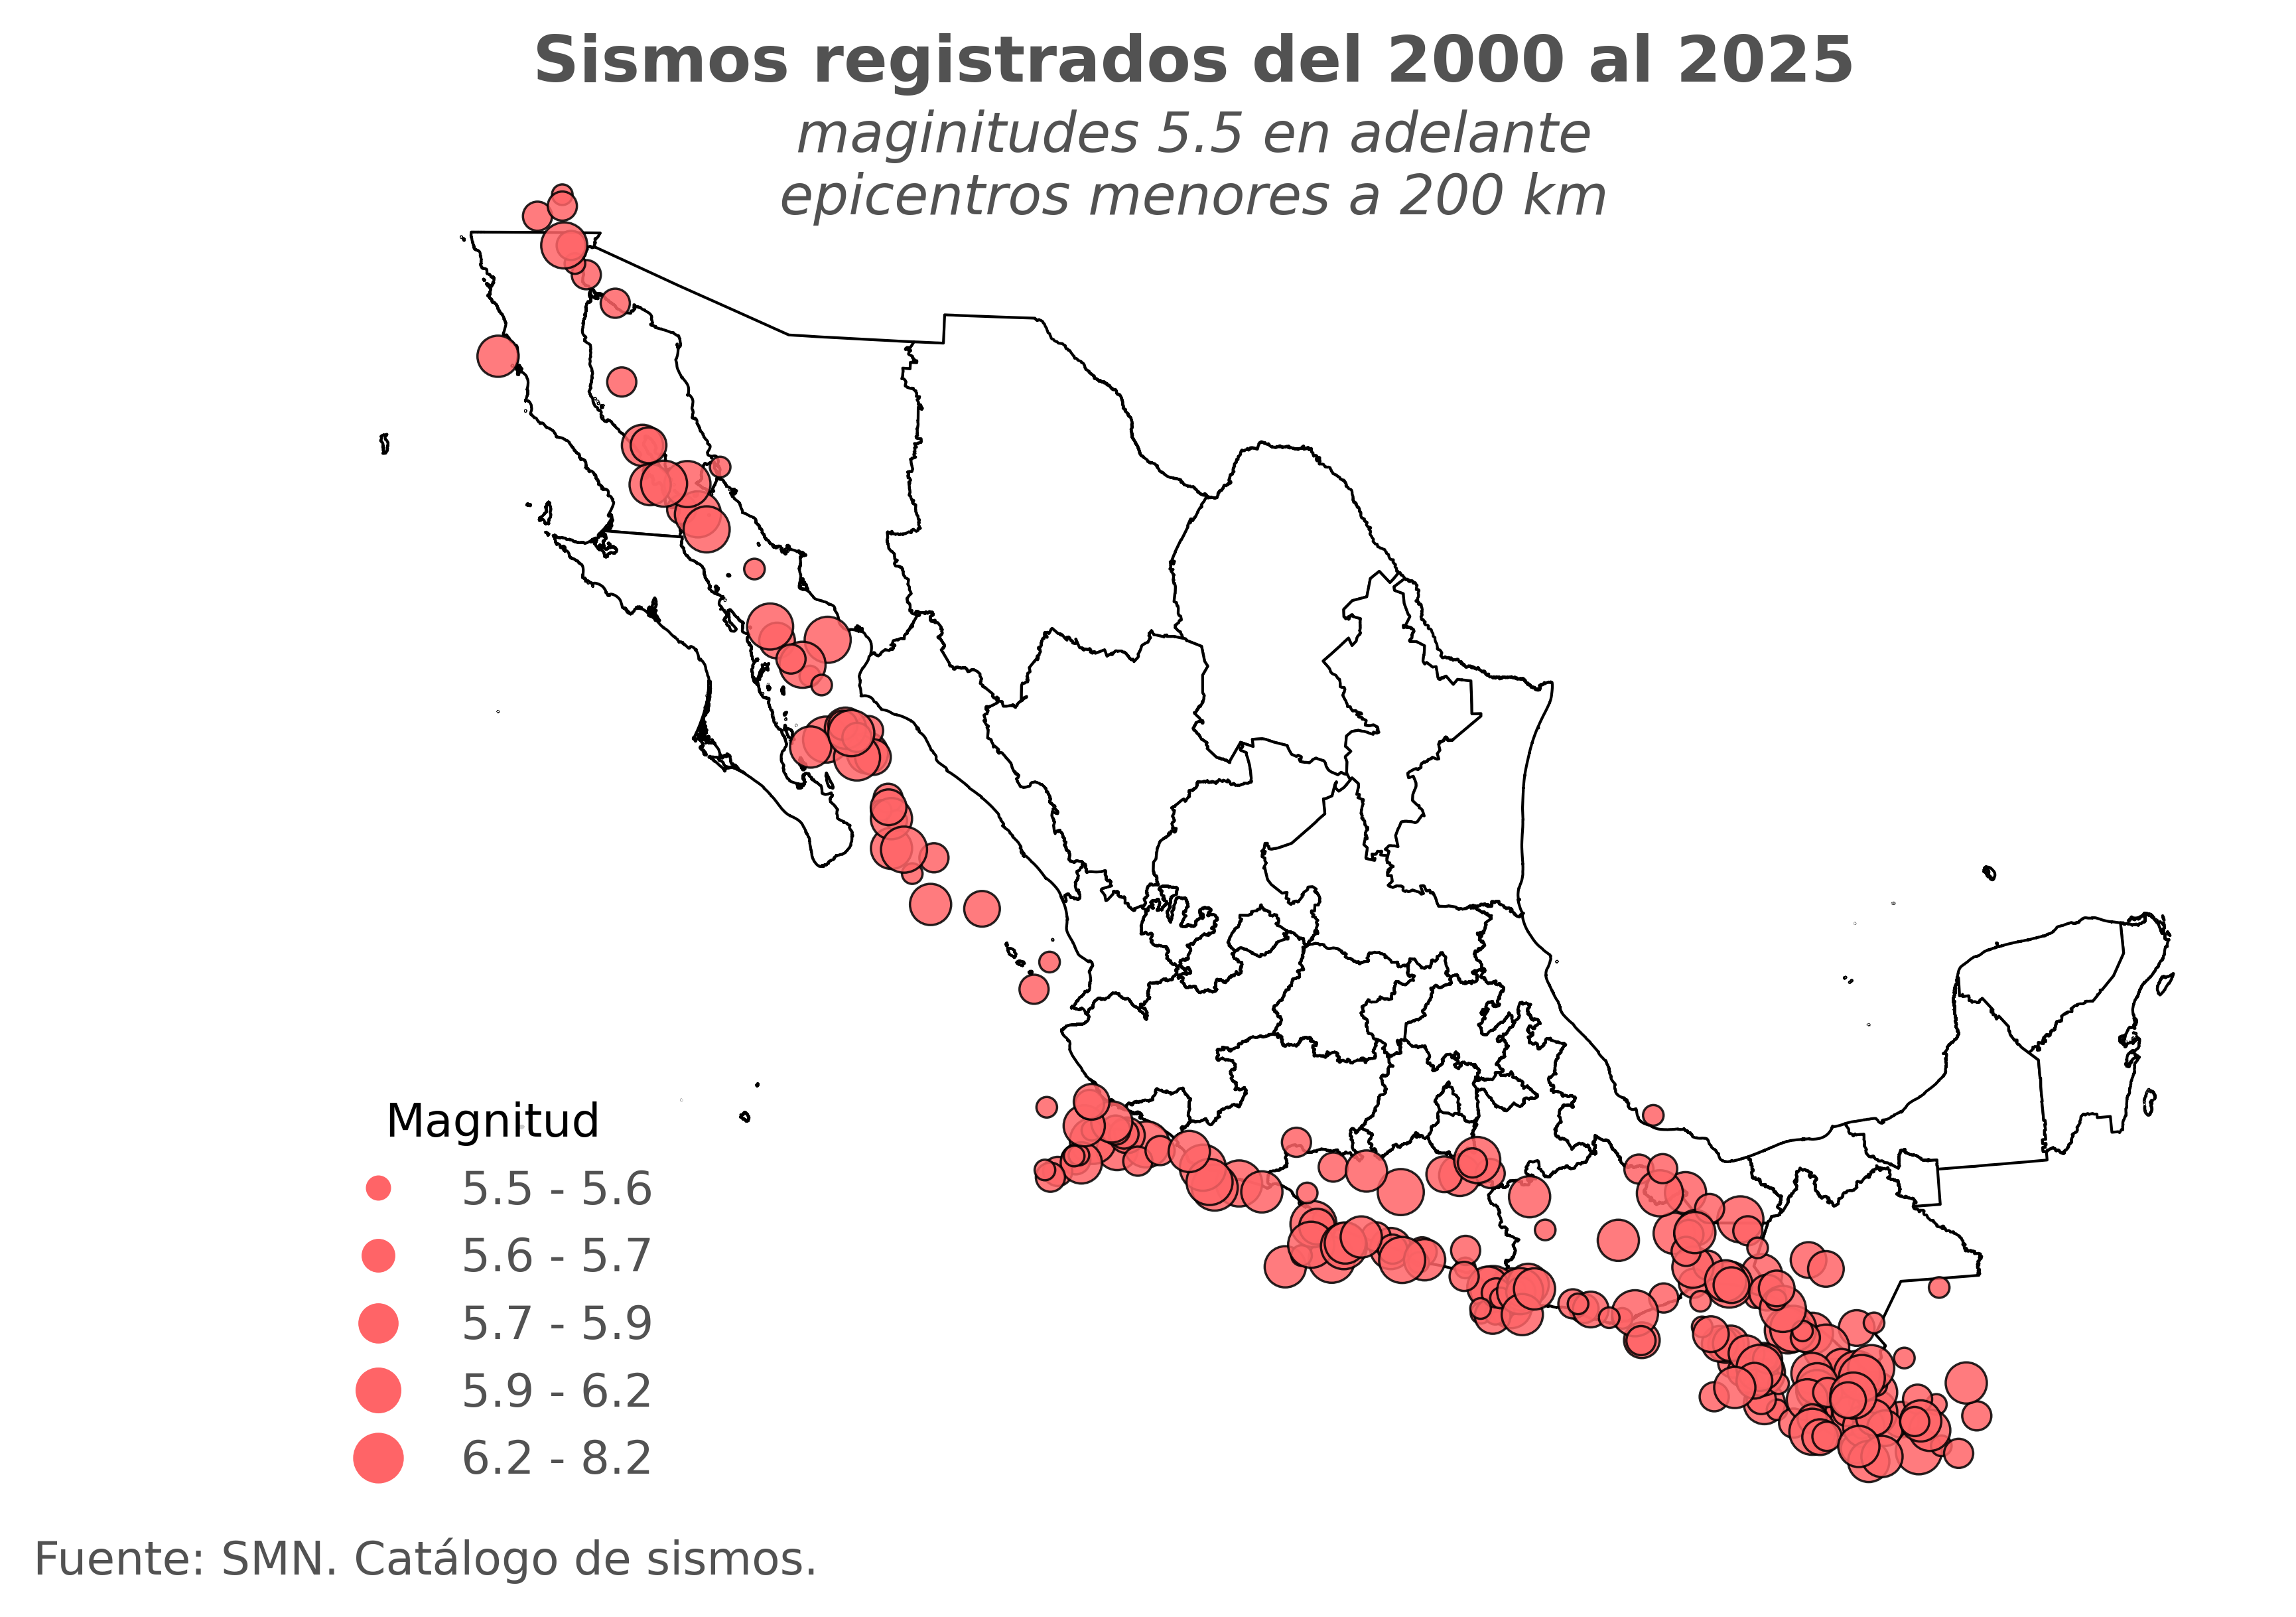

In [72]:
# 6. Mapa final

from matplotlib.lines import Line2D
import numpy as np

fig, ax = plt.subplots(figsize = (10,5), dpi = 500)
# Capa de la cartografía por división política (estatal)
Mapa.plot(
    ax = ax,
    color = "white",
    edgecolor = "black",
    linewidth=0.6
)
# Capa de sismos
Sismos_GDF_ct.plot(
    ax = ax,
    markersize = Sismos_GDF_ct['size'],
    color = "#FF6467",
    edgecolor = 'black',
    linewidth = 0.5,
    alpha = 0.85
)
handles = [
    Line2D(
      [0],[0],
      marker = 'o',
      color = "#FF6467",
      label = lab,
      markersize = np.sqrt(size),
      linestyle = 'None'
    )
    for lab, size in zip(labels, [20, 40, 60, 80 ,100])
]
ax.legend(
    handles = handles,
    title = "Magnitud",
    loc = "lower left",
    frameon = True
)
plt.figtext(0.4, 0.95, "Sismos registrados del 2000 al 2025",
            fontweight = 'bold',
            color = "#525252",
            ha = 'center',
            fontsize = 14) # Titulo
plt.figtext(0.4, 0.87, "maginitudes 5.5 en adelante\nepicentros menores a 200 km",
            style = "italic",
            color = "#525252",
            ha = 'center',
            fontsize = 12) # Subtitulo
plt.figtext(0.05, 0.05, "Fuente: SMN. Catálogo de sismos.",
            color = "#525252",
            fontsize = 10) # Pie de gráfico
ax.set_axis_off()
ax = plt.gca()
leg = ax.get_legend()
for text in leg.get_texts():
  text.set_color('#525252')
if leg is not None:
  leg.get_frame().set_linewidth(0)
  leg.get_frame().set_edgecolor("none")
plt.grid(False)
plt.tight_layout(rect = [0,0.05,0.85,0.95])
ruta_guardado = '/content/drive/MyDrive/SciData/GEOAES_25/Salidas/MapaSismos_final.png'
plt.savefig(ruta_guardado, dpi = 500, bbox_inches = 'tight', facecolor = 'white')

